r = 0.04900500000000001


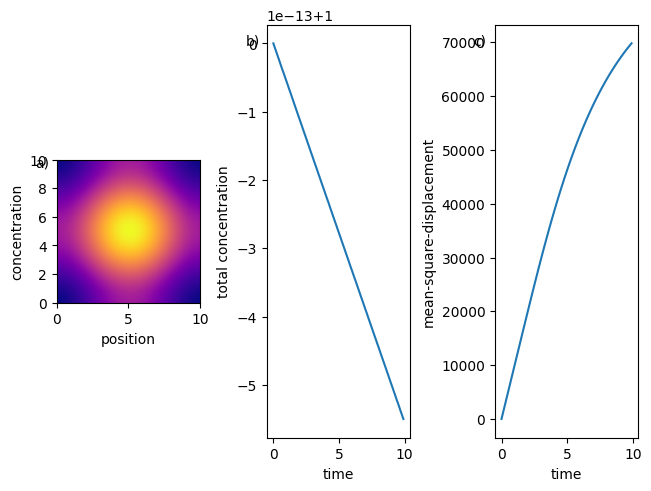

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def msd(array):
    md = 0.0
    for i in range(len(array)):
        md += array[i] * float(i)
    md /= np.sum(array)
    
    msd = 0.0
    for i in range(len(array)):
        msd += array[i] * (float(i)**2 - md**2)
    msd /= np.sum(array)
    
    return msd

# Define system
numberOfParticles = 1
systemLength = 10.0
diffusionConstant = 0.5
NSpatial = 100  # must be even -> odd number of spatial points
deltaX = systemLength / float(NSpatial - 1)
deltaTime = 1e-3

# Determine r and check if r < 0.5
r = diffusionConstant * deltaTime / deltaX**2
if r > 0.5:
    print('r > 0.5, stopping')
    exit()
else:
    print('r = ' + str(r))

# Set simulation variables
iterationNum = 10000
iterationOutputFreq = 100

# Define initial (localized) concentration matrix
C = np.zeros((NSpatial, NSpatial))
C[NSpatial // 2, NSpatial // 2] = float(numberOfParticles)  # localized concentration in the middle of the system

# Define subplot arrangement
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(1, 3)
panel00 = fig.add_subplot(gs[0, 0])
panel01 = fig.add_subplot(gs[0, 1])
panel02 = fig.add_subplot(gs[0, 2])

# Plot spatial evolution 
panel00.set_xlabel(r'position')
panel00.set_ylabel(r'concentration')
panel00.text(-0.15, 0.95, 'a)', transform=panel00.transAxes)

# Plot temporal evolution
panel01.set_xlabel(r'time')
panel01.set_ylabel(r'total concentration')
panel01.text(-0.15, 0.95, 'b)', transform=panel01.transAxes)

# Plot mean-square-displacement (variance) associated with concentration profile
panel02.set_xlabel(r'time')
panel02.set_ylabel(r'mean-square-displacement')
panel02.text(-0.15, 0.95, 'c)', transform=panel02.transAxes)

# Initialize time and total concentration lists
timeList = [0.0]
totalCList = [np.sum(C)]
msdList = [0.0]

# Generate plot of starting solution
panel00.imshow(C, extent=[0, systemLength, 0, systemLength], origin='lower', cmap='plasma')

# Iterate the FDM-Diffusion recurrence relation 'iterationNum' times 
for iteration in range(1, iterationNum):
    # Make a copy of the current concentration
    C1 = C.copy()
    
    # Update concentration with periodic boundary conditions
    for nx in range(NSpatial):
        for ny in range(NSpatial):
            C[nx, ny] = (r * C1[(nx - 1) % NSpatial, ny] +
                         r * C1[(nx + 1) % NSpatial, ny] +
                         r * C1[nx, (ny - 1) % NSpatial] +
                         r * C1[nx, (ny + 1) % NSpatial] +
                         (1.0 - 4.0 * r) * C1[nx, ny])
    
    # Every 'iterationOutputFreq' iteration generate a plot of the solution
    if (iteration % iterationOutputFreq == 0):
        panel00.imshow(C, extent=[0, systemLength, 0, systemLength], origin='lower', cmap='plasma')
        timeList.append(timeList[-1] + float(iterationOutputFreq) * deltaTime)
        msdList.append(msd(C.flatten()) * deltaX**2)
        totalCList.append(np.sum(C))

# Output all plots to the screen
panel01.plot(timeList, totalCList)
panel02.plot(timeList, msdList)
plt.show()

r = 0.04900500000000001


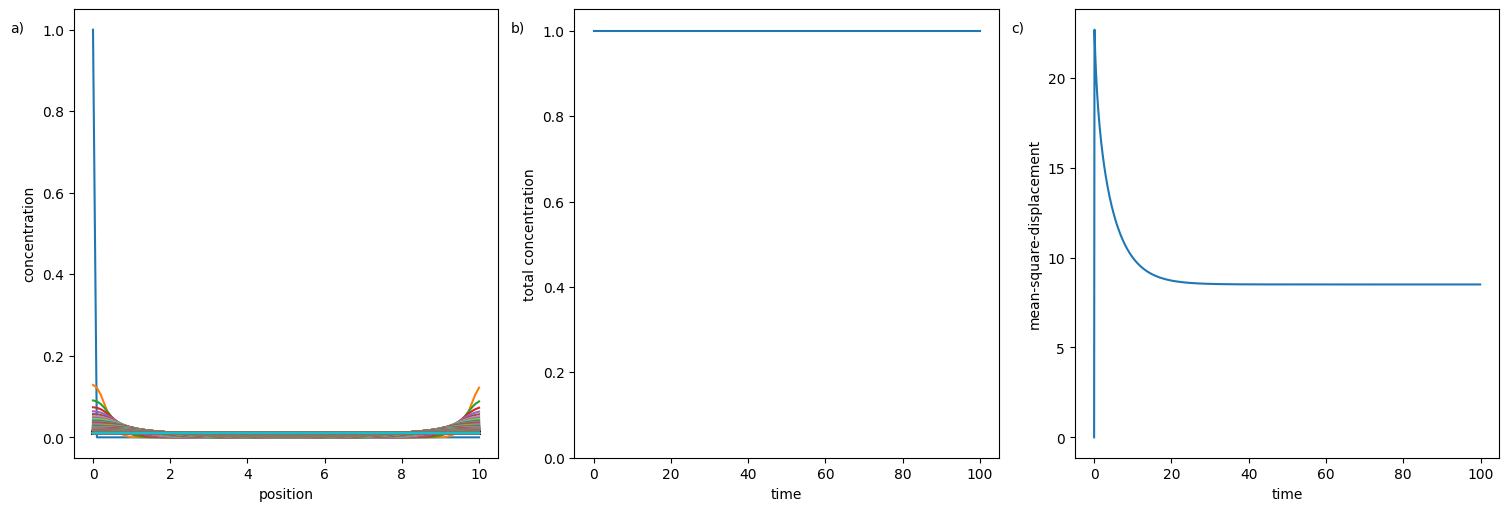

5